## EDA Spotify dataset
By: María de los Ángeles Amú - 2221225

The step #1 is to import the modules:

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from prettytable import PrettyTable
import random
import numpy as np

Now, let's read our csv:

In [27]:
spotify=pd.read_csv("../Data/spotify_dataset.csv")
spotify.head(5)

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


Here we can see that the "Unnamed" column gives me the ID information, but I am considering eliminating it later to optimize my analysis. Besides we already have one main identifier, so why have 2?

In [28]:
spotify.shape

(114000, 21)

We have 114000 rows and 21 columns.

In the following chart, we will count the types of data we have in our dataset:

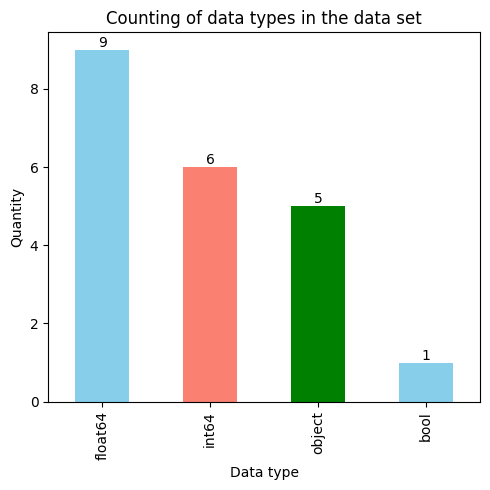

In [29]:
data_types_counts = spotify.dtypes.value_counts()

colors = ['skyblue', 'salmon', 'green']

plt.figure(figsize=(5, 5))
bar_plot = data_types_counts.plot(kind='bar', color=colors)

plt.xlabel('Data type')
plt.ylabel('Quantity')
plt.title('Counting of data types in the data set')

for i, value in enumerate(data_types_counts):
    plt.text(i, value + 0, str(value), ha='center', va='bottom')

plt.tight_layout()
plt.show()

We have 9 float columns, 6 integer columns, 5 object columns and 1 bool column.

In the following statistics we can see which columns correspond to this type of data.

In [30]:
spotify.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114000 entries, 0 to 113999
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        114000 non-null  int64  
 1   track_id          114000 non-null  object 
 2   artists           113999 non-null  object 
 3   album_name        113999 non-null  object 
 4   track_name        113999 non-null  object 
 5   popularity        114000 non-null  int64  
 6   duration_ms       114000 non-null  int64  
 7   explicit          114000 non-null  bool   
 8   danceability      114000 non-null  float64
 9   energy            114000 non-null  float64
 10  key               114000 non-null  int64  
 11  loudness          114000 non-null  float64
 12  mode              114000 non-null  int64  
 13  speechiness       114000 non-null  float64
 14  acousticness      114000 non-null  float64
 15  instrumentalness  114000 non-null  float64
 16  liveness          11

In the following chart, we can see in detail which columns contain null values:

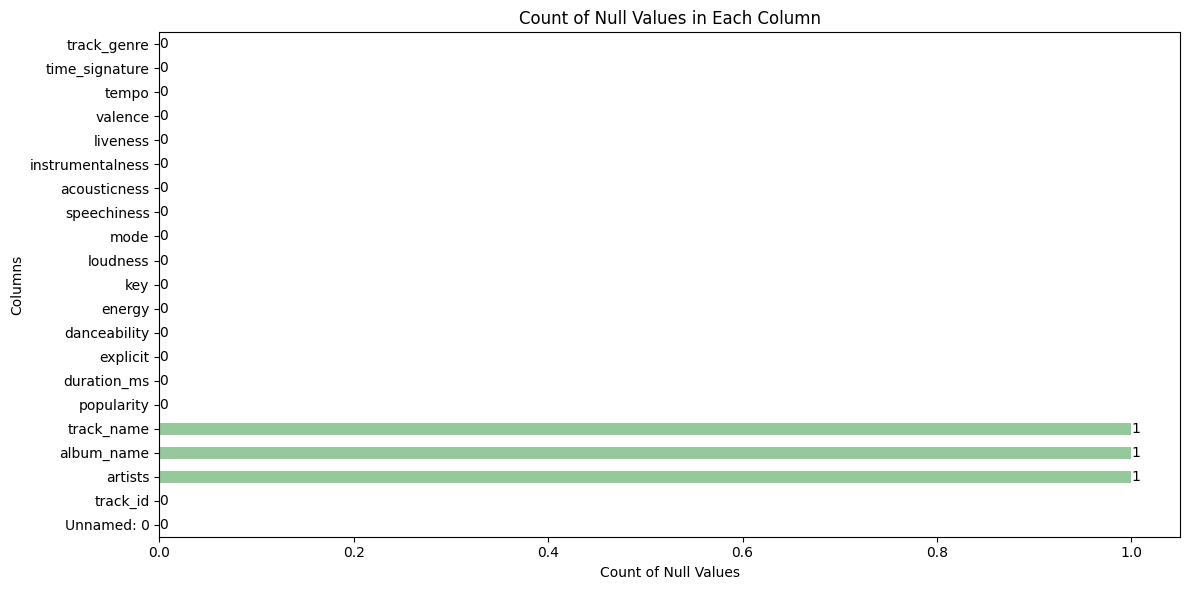

In [31]:
null_counts = spotify.isnull().sum()

plt.figure(figsize=(12, 6))
null_counts.plot(kind='barh', color='#95c99c')

plt.title('Count of Null Values in Each Column')
plt.xlabel('Count of Null Values')
plt.ylabel('Columns')

for i, value in enumerate(null_counts):
    plt.text(value, i, str(value), ha='left', va='center')

plt.tight_layout()
plt.show()

Number of Unique values per columns:

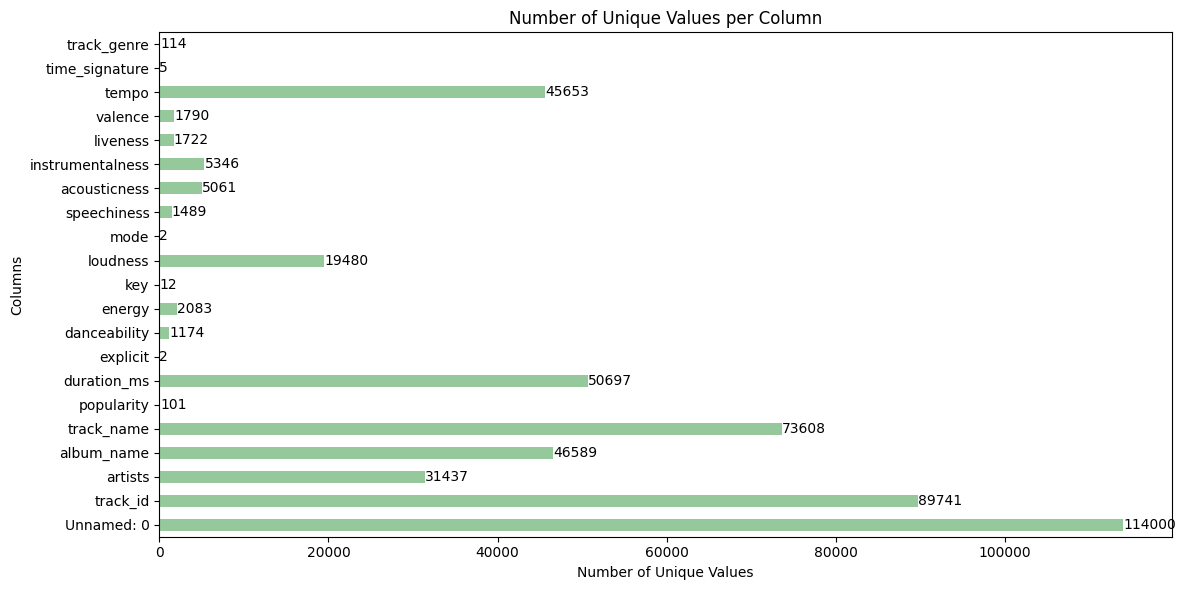

In [32]:
unique_counts = spotify.nunique()

colors = ['#95c99c']

plt.figure(figsize=(12, 6)) 
bar_plot = unique_counts.plot(kind='barh', color=colors)

plt.ylabel('Columns')
plt.xlabel('Number of Unique Values')
plt.title('Number of Unique Values per Column')

for i, value in enumerate(unique_counts):
    plt.text(value, i, str(value), ha='left', va='center')

plt.tight_layout()
plt.show()

This graph gives us the unique values per column, and we can see that there are values that are repeated in all columns.

In [33]:
spotify.describe()

,Unnamed: 0,popularity,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
count,114000.000000,114000.000000,1.140000e+05,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000
mean,56999.500000,33.238535,2.280292e+05,0.566800,0.641383,5.309140,-8.258960,0.637553,0.084652,0.314910,0.156050,0.213553,0.474068,122.147837,3.904035
std,32909.109681,22.305078,1.072977e+05,0.173542,0.251529,3.559987,5.029337,0.480709,0.105732,0.332523,0.309555,0.190378,0.259261,29.978197,0.432621
min,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,-49.531000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,28499.750000,17.000000,1.740660e+05,0.456000,0.472000,2.000000,-10.013000,0.000000,0.035900,0.016900,0.000000,0.098000,0.260000,99.218750,4.000000
50%,56999.500000,35.000000,2.129060e+05,0.580000,0.685000,5.000000,-7.004000,1.000000,0.048900,0.169000,0.000042,0.132000,0.464000,122.017000,4.000000
75%,85499.250000,50.000000,2.615060e+05,0.695000,0.854000,8.000000,-5.003000,1.000000,0.084500,0.598000,0.049000,0.273000,0.683000,140.071000,4.000000
max,113999.000000,100.000000,5.237295e+06,0.985000,1.000000,11.000000,4.532000,1.000000,0.965000,0.996000,1.000000,1.000000,0.995000,243.372000,5.000000


Having analyzed the statistics much better, I was able to get this ".describe()" mostly to see the minima and maxima of each column and thus go a little deeper into my analytics; and seeing this answered some questions I had initially.
For example, some findings I identified were:
- popularity: The popularity of the song on a scale of 0 to 100.
- duration_ms: The duration of the song in milliseconds.
- danceability: A value indicating how suitable a track is for dancing, with 0 being not very suitable and 1 being very suitable.
- energy: A measure of the intensity and activity of the song, typically ranging from 0 to 1.

In addition, all columns have a total of 114,000 counts; we can also see other statistics to analyze such as "mean", "std", "25%", 50%" and "75%". With these findings I open a little more my analytical focus. But as I mentioned before, I mainly did it to analyze the minima and maxima of each column.

### Transformations

1. Delete the "Unnamed" column. As I mentioned at first, this column give us a ID, but really we have other ID

In [34]:
spotify.drop(['Unnamed: 0'], axis=1, inplace=True)
spotify.head(5)

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


Now, let's check how many duplicate values we have to see what we can do. One way to check is by "Track_id", so let's do it.

In [35]:
duplicated_track = spotify.groupby(['track_id']).size().reset_index(name='count')
duplicated_track.sort_values(by = 'count', ascending= False)

,track_id,count
74276,6S3JlDAGk3uu3NtZbPnuhS,9
31724,2kkvB3RNRzwjFdGhaUA0tz,8
25740,2Ey6v4Sekh3Z0RUSISRosD,8
49042,4GPQDyw9hC1DiZVh0ouDVL,7
69228,61202Zzk9rk4bPMZLh2gr6,7
...,...,...
32929,2rHfLANXNn5ppnW0jqv8h2,1
32928,2rHX2oJ6sy9knGTBge4A3E,1
32927,2rHJDOPLTw7w5NqrTg3iBb,1
32926,2rHEyeBDE2w9jOMpTV1ICj,1


Wow, it is shocking to see how many there are repeats, confirming that the most repeated track_id is "6S3JlDAGk3uu3NtZbPnuhS" with a total of 9 repeats.

Now, let's see where this ID is repeated:

In [36]:
conted_tracks = spotify.groupby('track_id').size()

track_id_repeated = conted_tracks.idxmax()

rows_track_id_repetido = spotify[spotify['track_id'] == track_id_repeated]

rows_track_id_repetido

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
8315,6S3JlDAGk3uu3NtZbPnuhS,Badfinger,Straight Up (Remastered 2010 / Deluxe Edition),Baby Blue - Remastered 2010,67,217346,False,0.623,0.876,11,-7.788,1,0.066,0.0189,0.0134,0.0728,0.515,124.431,4,blues
19759,6S3JlDAGk3uu3NtZbPnuhS,Badfinger,Straight Up (Remastered 2010 / Deluxe Edition),Baby Blue - Remastered 2010,67,217346,False,0.623,0.876,11,-7.788,1,0.066,0.0189,0.0134,0.0728,0.515,124.431,4,country
34728,6S3JlDAGk3uu3NtZbPnuhS,Badfinger,Straight Up (Remastered 2010 / Deluxe Edition),Baby Blue - Remastered 2010,67,217346,False,0.623,0.876,11,-7.788,1,0.066,0.0189,0.0134,0.0728,0.515,124.431,4,folk
62226,6S3JlDAGk3uu3NtZbPnuhS,Badfinger,Straight Up (Remastered 2010 / Deluxe Edition),Baby Blue - Remastered 2010,67,217346,False,0.623,0.876,11,-7.788,1,0.066,0.0189,0.0134,0.0728,0.515,124.431,4,j-pop
63087,6S3JlDAGk3uu3NtZbPnuhS,Badfinger,Straight Up (Remastered 2010 / Deluxe Edition),Baby Blue - Remastered 2010,67,217346,False,0.623,0.876,11,-7.788,1,0.066,0.0189,0.0134,0.0728,0.515,124.431,4,j-rock
82064,6S3JlDAGk3uu3NtZbPnuhS,Badfinger,Straight Up (Remastered 2010 / Deluxe Edition),Baby Blue - Remastered 2010,67,217346,False,0.623,0.876,11,-7.788,1,0.066,0.0189,0.0134,0.0728,0.515,124.431,4,power-pop
84129,6S3JlDAGk3uu3NtZbPnuhS,Badfinger,Straight Up (Remastered 2010 / Deluxe Edition),Baby Blue - Remastered 2010,67,217346,False,0.623,0.876,11,-7.788,1,0.066,0.0189,0.0134,0.0728,0.515,124.431,4,psych-rock
99727,6S3JlDAGk3uu3NtZbPnuhS,Badfinger,Straight Up (Remastered 2010 / Deluxe Edition),Baby Blue - Remastered 2010,67,217346,False,0.623,0.876,11,-7.788,1,0.066,0.0189,0.0134,0.0728,0.515,124.431,4,singer-songwriter
102732,6S3JlDAGk3uu3NtZbPnuhS,Badfinger,Straight Up (Remastered 2010 / Deluxe Edition),Baby Blue - Remastered 2010,67,217346,False,0.623,0.876,11,-7.788,1,0.066,0.0189,0.0134,0.0728,0.515,124.431,4,songwriter


As we can see, the values of all the columns are repeated, except for the "track_genre" column, and this is something strange, because it is impossible that the same song has the same "track_genre", knowing that all its names are being repeated. Here we can also observe that they may have been randomly generated.

To eliminate the repeating ones, what I will do is to take a unique value from each of the repeating "track_id", to remove the duplicates and leave only one genre.

In [37]:
# Group by 'track_id' and take a random sample of one row from each group
spotify = spotify.groupby('track_id', as_index=False).apply(lambda group: group.sample(n=1, random_state=random.seed())).reset_index(drop=True)

spotify

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0000vdREvCVMxbQTkS888c,Rill,Lolly,Lolly,44,160725,True,0.910,0.37400,8,-9.844,0,0.1990,0.075700,0.00301,0.1540,0.432,104.042,4,german
1,000CC8EParg64OmTxVnZ0p,Glee Cast,Glee Love Songs,It's All Coming Back To Me Now (Glee Cast Vers...,47,322933,False,0.269,0.51600,0,-7.361,1,0.0366,0.406000,0.00000,0.1170,0.341,178.174,4,club
2,000Iz0K615UepwSJ5z2RE5,Paul Kalkbrenner;Pig&Dan,X,Böxig Leise - Pig & Dan Remix,22,515360,False,0.686,0.56000,5,-13.264,0,0.0462,0.001140,0.18100,0.1110,0.108,119.997,4,minimal-techno
3,000RDCYioLteXcutOjeweY,Jordan Sandhu,Teeje Week,Teeje Week,62,190203,False,0.679,0.77000,0,-3.537,1,0.1900,0.058300,0.00000,0.0825,0.839,161.721,4,hip-hop
4,000qpdoc97IMTBvF8gwcpy,Paul Kalkbrenner,Zeit,Tief,19,331240,False,0.519,0.43100,6,-13.606,0,0.0291,0.000964,0.72000,0.0916,0.234,129.971,4,minimal-techno
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89736,7zxHiMmVLt4LGWpOMqOpUh,Haricharan;Gopi Sundar,Bangalore Days,"Aethu Kari Raavilum - From ""Bangalore Days""",56,325156,False,0.766,0.38200,7,-11.464,0,0.0324,0.698000,0.00143,0.1570,0.672,119.992,4,pop-film
89737,7zxpdh3EqMq2JCkOI0EqcG,Piano Genie,Disney Favourites,"Two Worlds (From ""Tarzan"")",23,109573,False,0.529,0.00879,10,-32.266,1,0.0587,0.996000,0.95900,0.0916,0.510,82.694,4,disney
89738,7zyYmIdjqqiX6kLryb7QBx,Eric Chou,學著愛,以後別做朋友,61,260573,False,0.423,0.36000,3,-9.458,1,0.0372,0.728000,0.00000,0.1050,0.291,130.576,4,mandopop
89739,7zybSU9tFO9HNlwmGF7stc,Stereoclip,Echoes,Sunset Drive,54,234300,False,0.649,0.83400,10,-11.430,0,0.0397,0.268000,0.93200,0.0974,0.150,125.004,4,electronic


We verify:

In [38]:
duplicated_track = spotify.groupby(['track_id']).size().reset_index(name='count')
duplicated_track.sort_values(by = 'count', ascending= False)

,track_id,count
0,0000vdREvCVMxbQTkS888c,1
59824,5D0wjc5MIToteDeEMKCk8g,1
59832,5D2cMPwNY9Ftb7vqInLLQK,1
59831,5D2RBWVKgLv4CimNGBUcWS,1
59830,5D2N5cbso4bMxbhrfdqA4a,1
...,...,...
29913,2bHGHbsFmjQdmdE7hZSKr6,1
29912,2bH2audXWKrZXRgCDomrzm,1
29911,2bGm7xy64NrrXyVkLyssFU,1
29910,2bGfiXJK08TgjT3wMasCfV,1


Now, let's see how many times the songs are repeated with the same artist and we will take one as an example to analyze it well:

In [39]:
spotify['track_name'] = spotify['track_name'].str.lower()
grouped = spotify.groupby(['track_name', 'artists']).size().reset_index(name='count')
grouped.sort_values(by = 'count', ascending= False)

,track_name,artists,count
55898,rockin' around the christmas tree,Brenda Lee,45
38577,little saint nick - 1991 remix,The Beach Boys,41
56404,run rudolph run,Chuck Berry,40
24351,frosty the snowman,Ella Fitzgerald,34
37649,let it snow! let it snow! let it snow!,Dean Martin,32
...,...,...,...
27820,headlights (feat. kiddo),Alok;Alan Walker;KIDDO,1
27818,headlights,Charlie Cunningham,1
27817,headless,Cannibal Corpse,1
27816,heading south,Zach Bryan,1


We can see that the song "rockin' around the christmas tree" from Brenda Lee is the most repeated song, with a total of 45 repetitions.

In [40]:
rows_rockin = spotify[spotify['track_name'] == "rockin' around the christmas tree"]
rows_rockin.head(10)

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
6374,0YjOQE1HN5tm60RXOWKUnm,Cooltime Kids,Oh Santa! Kids Christmas Songs,rockin' around the christmas tree,0,125840,False,0.745,0.722,9,-4.067,1,0.0464,0.586,0.0,0.334,0.893,145.378,4,party
8319,0j6FbpWCboFDsKxeWOqhOi,Brenda Lee,Best Christmas Music 2022,rockin' around the christmas tree,0,123453,False,0.631,0.569,5,-5.956,0,0.0438,0.728,0.0,0.270,0.874,71.078,4,rockabilly
10137,0t5sWeoRaFXUxu4xTtoTLd,Brenda Lee,Christmas Eve At Home,rockin' around the christmas tree,0,123453,False,0.631,0.569,5,-5.956,0,0.0438,0.728,0.0,0.270,0.874,71.078,4,rockabilly
11885,127PZFbwkTh2DDG3OLETbb,Brenda Lee,pov: you rock around the christmas tree,rockin' around the christmas tree,0,123453,False,0.631,0.569,5,-5.956,0,0.0438,0.728,0.0,0.270,0.874,71.078,4,rockabilly
17095,1Tq4dufJO0EwRQUQrIkgu5,Brenda Lee,Weihnachten Musik,rockin' around the christmas tree,0,123453,False,0.631,0.569,5,-5.956,0,0.0438,0.728,0.0,0.270,0.874,71.078,4,rockabilly
17291,1UsAO8Vl1UgWuRMcNDvffu,Brenda Lee,Silent Night,rockin' around the christmas tree,0,123453,False,0.631,0.569,5,-5.956,0,0.0438,0.728,0.0,0.270,0.874,71.078,4,rockabilly
17837,1XhMDkExXkwO1C3oJtcEwB,Brenda Lee,pov: you have a holly jolly christmas,rockin' around the christmas tree,0,123453,False,0.631,0.569,5,-5.956,0,0.0438,0.728,0.0,0.270,0.874,71.078,4,rockabilly
18560,1bspDLAXNjbSmqThncJaA3,Brenda Lee,Christmas Country Songs 2022,rockin' around the christmas tree,0,123453,False,0.631,0.569,5,-5.956,0,0.0438,0.728,0.0,0.270,0.874,71.078,4,rockabilly
20872,1ort5ZSs5dxZR9Q7NJNIKA,Brenda Lee,pov: you are walking in a winter wonderland,rockin' around the christmas tree,0,123453,False,0.631,0.569,5,-5.956,0,0.0438,0.728,0.0,0.270,0.874,71.078,4,rockabilly
22301,1wNMaLFck9jsXipv8CQG0w,Brenda Lee,All I Want For Christmas Is You,rockin' around the christmas tree,0,123453,False,0.631,0.569,5,-5.956,0,0.0438,0.728,0.0,0.270,0.874,71.078,4,rockabilly


Here, we can see in the first row that song appears but with another artist. But let's focus on Brenda Lee's to review them:

In [41]:
rows_rockin_brenda = spotify[(spotify['track_name'] == "rockin' around the christmas tree") & (spotify['artists'] == "Brenda Lee")]

rows_rockin_brenda.head(10)

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
8319,0j6FbpWCboFDsKxeWOqhOi,Brenda Lee,Best Christmas Music 2022,rockin' around the christmas tree,0,123453,False,0.631,0.569,5,-5.956,0,0.0438,0.728,0.0,0.27,0.874,71.078,4,rockabilly
10137,0t5sWeoRaFXUxu4xTtoTLd,Brenda Lee,Christmas Eve At Home,rockin' around the christmas tree,0,123453,False,0.631,0.569,5,-5.956,0,0.0438,0.728,0.0,0.27,0.874,71.078,4,rockabilly
11885,127PZFbwkTh2DDG3OLETbb,Brenda Lee,pov: you rock around the christmas tree,rockin' around the christmas tree,0,123453,False,0.631,0.569,5,-5.956,0,0.0438,0.728,0.0,0.27,0.874,71.078,4,rockabilly
17095,1Tq4dufJO0EwRQUQrIkgu5,Brenda Lee,Weihnachten Musik,rockin' around the christmas tree,0,123453,False,0.631,0.569,5,-5.956,0,0.0438,0.728,0.0,0.27,0.874,71.078,4,rockabilly
17291,1UsAO8Vl1UgWuRMcNDvffu,Brenda Lee,Silent Night,rockin' around the christmas tree,0,123453,False,0.631,0.569,5,-5.956,0,0.0438,0.728,0.0,0.27,0.874,71.078,4,rockabilly
17837,1XhMDkExXkwO1C3oJtcEwB,Brenda Lee,pov: you have a holly jolly christmas,rockin' around the christmas tree,0,123453,False,0.631,0.569,5,-5.956,0,0.0438,0.728,0.0,0.27,0.874,71.078,4,rockabilly
18560,1bspDLAXNjbSmqThncJaA3,Brenda Lee,Christmas Country Songs 2022,rockin' around the christmas tree,0,123453,False,0.631,0.569,5,-5.956,0,0.0438,0.728,0.0,0.27,0.874,71.078,4,rockabilly
20872,1ort5ZSs5dxZR9Q7NJNIKA,Brenda Lee,pov: you are walking in a winter wonderland,rockin' around the christmas tree,0,123453,False,0.631,0.569,5,-5.956,0,0.0438,0.728,0.0,0.27,0.874,71.078,4,rockabilly
22301,1wNMaLFck9jsXipv8CQG0w,Brenda Lee,All I Want For Christmas Is You,rockin' around the christmas tree,0,123453,False,0.631,0.569,5,-5.956,0,0.0438,0.728,0.0,0.27,0.874,71.078,4,rockabilly
24109,264ZS67Jh0vG6VG46JB7A3,Brenda Lee,Weihnachtssongs,rockin' around the christmas tree,0,123453,False,0.631,0.569,5,-5.956,0,0.0438,0.728,0.0,0.27,0.874,71.078,4,rockabilly


In these results, we can see that there is another artist with the same name of the song, but his genre is different. As proof I looked it up on the internet to see if it existed and it does, as you can see there, it is from the band "Cooltime kids", which is a children's musical group.

Also, a significant finding, and that is that we have albums with the "pov", and I assume that these are albums created by spotify users separately. For example, we can see "pov: you rock around the christmas tree", which by searching on spotify, you can see playlists created by spotify users.

For example, "rockin' around the christmas tree" belongs to the album called "Merry Christmas from Brenda Lee", so the names that appear in the "album_name" can be both the playlist and the albums.

Now, something I want to do is to convert the "duration_ms" column, which is in milliseconds, to minutes but rounded:

In [42]:
spotify['duration_ms'] = (spotify['duration_ms'] / 60000).round().astype(int)

spotify.rename(columns={'duration_ms': 'duration_min'}, inplace=True)
spotify.head(5)

,track_id,artists,album_name,track_name,popularity,duration_min,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0000vdREvCVMxbQTkS888c,Rill,Lolly,lolly,44,3,True,0.910,0.374,8,-9.844,0,0.1990,0.075700,0.00301,0.1540,0.432,104.042,4,german
1,000CC8EParg64OmTxVnZ0p,Glee Cast,Glee Love Songs,it's all coming back to me now (glee cast vers...,47,5,False,0.269,0.516,0,-7.361,1,0.0366,0.406000,0.00000,0.1170,0.341,178.174,4,club
2,000Iz0K615UepwSJ5z2RE5,Paul Kalkbrenner;Pig&Dan,X,böxig leise - pig & dan remix,22,9,False,0.686,0.560,5,-13.264,0,0.0462,0.001140,0.18100,0.1110,0.108,119.997,4,minimal-techno
3,000RDCYioLteXcutOjeweY,Jordan Sandhu,Teeje Week,teeje week,62,3,False,0.679,0.770,0,-3.537,1,0.1900,0.058300,0.00000,0.0825,0.839,161.721,4,hip-hop
4,000qpdoc97IMTBvF8gwcpy,Paul Kalkbrenner,Zeit,tief,19,6,False,0.519,0.431,6,-13.606,0,0.0291,0.000964,0.72000,0.0916,0.234,129.971,4,minimal-techno


Another transformation to be done is to categorize the genres, for this I will first show which genres I have in order to do so.

In [43]:
genres = spotify['track_genre'].unique()
genres

array(['german', 'club', 'minimal-techno', 'hip-hop', 'comedy', 'soul',
       'ska', 'bluegrass', 'happy', 'drum-and-bass', 'idm', 'rock',
       'punk-rock', 'sad', 'honky-tonk', 'industrial', 'j-dance',
       'grindcore', 'french', 'world-music', 'hard-rock', 'pagode',
       'turkish', 'indian', 'children', 'j-rock', 'power-pop', 'jazz',
       'romance', 'study', 'metal', 'afrobeat', 'black-metal', 'grunge',
       'opera', 'show-tunes', 'heavy-metal', 'k-pop', 'progressive-house',
       'acoustic', 'anime', 'ambient', 'dubstep', 'iranian',
       'singer-songwriter', 'synth-pop', 'chicago-house', 'kids', 'disco',
       'blues', 'pop-film', 'gospel', 'mandopop', 'swedish', 'tango',
       'funk', 'latin', 'piano', 'spanish', 'salsa', 'samba',
       'electronic', 'goth', 'dance', 'malay', 'death-metal', 'trance',
       'country', 'hardstyle', 'folk', 'mpb', 'electro', 'alternative',
       'disney', 'chill', 'emo', 'j-idol', 'psych-rock', 'punk', 'guitar',
       'dub', 'deep-

In [44]:
genre_cat = {
    'Rock': ['alt-rock', 'hard-rock', 'punk-rock', 'grunge', 'rock', 'j-rock', 'psych-rock', 'punk', 'rock-n-roll'],
    'Metal': ['black-metal', 'heavy-metal', 'metal', 'metalcore', 'death-metal'],
    'Pop': ['pop', 'power-pop', 'latin-pop'],
    'Hip-Hop/R&B': ['hip-hop', 'r-n-b'],
    'Electronic': ['chicago-house', 'minimal-techno', 'electronic', 'techno', 'detroit-techno', 'disco', 'edm', 'electro', 'trance', 'dubstep', 'house', 'deep-house', 'dance', 'dancehall', 'breakbeat', 'hardstyle'],
    'Latin': ['latin', 'salsa', 'reggaeton', 'tango', 'samba', 'pagode', 'sertanejo', 'forro'],
    'Other': [
        'club', 'comedy', 'soul', 'ska', 'bluegrass', 'happy', 'drum-and-bass', 'idm', 'sad', 'honky-tonk', 'industrial', 'j-dance', 'grindcore', 'french', 'world-music', 'indian', 'children', 'jazz', 'romance', 'study', 'funk', 'afrobeat', 'opera', 'show-tunes', 'progressive-house', 'acoustic', 'anime', 'ambient', 'iranian', 'songwriter', 'synth-pop', 'kids', 'blues', 'pop-film', 'gospel', 'mandopop', 'swedish', 'reggae', 'piano', 'spanish', 'turkish', 'malay', 'country', 'mpb', 'indie', 'disney', 'chill', 'emo', 'rockabilly', 'j-idol', 'psych-rock', 'guitar', 'dub', 'groove', 'hardcore', 'rock-n-roll', 'brazil', 'indie-pop', 'trip-hop', 'singer-songwriter', 'party', 'sleep', 'garage', 'classical', 'j-pop', 'cantopop', 'british', 'folk', 'new-age', 'alternative', 'latino', 'edm'
    ]
}

def categorize_genre(track_genre):
    for key, value in genre_cat.items():
        if track_genre in value:
            return key
    return 'Other'  


spotify['genre_cat'] = spotify['track_genre'].apply(categorize_genre)


spotify.drop(columns=['track_genre'], inplace=True)

spotify.head(5)



,track_id,artists,album_name,track_name,popularity,duration_min,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,genre_cat
0,0000vdREvCVMxbQTkS888c,Rill,Lolly,lolly,44,3,True,0.910,0.374,8,-9.844,0,0.1990,0.075700,0.00301,0.1540,0.432,104.042,4,Other
1,000CC8EParg64OmTxVnZ0p,Glee Cast,Glee Love Songs,it's all coming back to me now (glee cast vers...,47,5,False,0.269,0.516,0,-7.361,1,0.0366,0.406000,0.00000,0.1170,0.341,178.174,4,Other
2,000Iz0K615UepwSJ5z2RE5,Paul Kalkbrenner;Pig&Dan,X,böxig leise - pig & dan remix,22,9,False,0.686,0.560,5,-13.264,0,0.0462,0.001140,0.18100,0.1110,0.108,119.997,4,Electronic
3,000RDCYioLteXcutOjeweY,Jordan Sandhu,Teeje Week,teeje week,62,3,False,0.679,0.770,0,-3.537,1,0.1900,0.058300,0.00000,0.0825,0.839,161.721,4,Hip-Hop/R&B
4,000qpdoc97IMTBvF8gwcpy,Paul Kalkbrenner,Zeit,tief,19,6,False,0.519,0.431,6,-13.606,0,0.0291,0.000964,0.72000,0.0916,0.234,129.971,4,Electronic


Now, I have already finished my main transformations, what I want to do is to eliminate the columns that are not relevant in the analytics I want to do; it will also help me much easier to do the respective merge.

In [45]:
columns_to_drop = ['track_id', 'album_name', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'tempo', 'time_signature']

spotify.drop(columns=columns_to_drop, inplace=True)
spotify.head(5) 

,artists,track_name,popularity,duration_min,explicit,danceability,energy,valence,genre_cat
0,Rill,lolly,44,3,True,0.910,0.374,0.432,Other
1,Glee Cast,it's all coming back to me now (glee cast vers...,47,5,False,0.269,0.516,0.341,Other
2,Paul Kalkbrenner;Pig&Dan,böxig leise - pig & dan remix,22,9,False,0.686,0.560,0.108,Electronic
3,Jordan Sandhu,teeje week,62,3,False,0.679,0.770,0.839,Hip-Hop/R&B
4,Paul Kalkbrenner,tief,19,6,False,0.519,0.431,0.234,Electronic


Let's review how many rows and columns we are left with:

In [46]:
spotify.shape

(89741, 9)

We can see that we went from 114000 rows to 89741 rows.

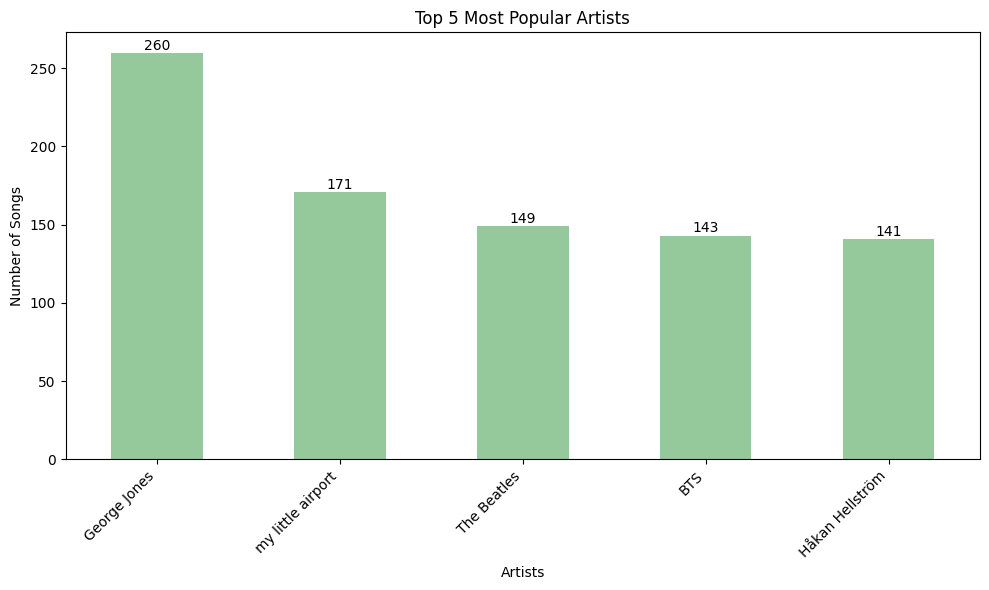

In [47]:
artist_counts = spotify['artists'].value_counts().head(5)

plt.figure(figsize=(10, 6))
artist_counts.plot(kind='bar', color='#95c99c')
plt.title('Top 5 Most Popular Artists')
plt.xlabel('Artists')
plt.ylabel('Number of Songs')
plt.xticks(rotation=45, ha='right')

for index, value in enumerate(artist_counts):
    plt.text(index, value + 0.1, str(value), ha='center', va='bottom')

plt.tight_layout()
plt.show()

In the above graph, we can see "George Jones" leading with a larger value of songs than the other artists.

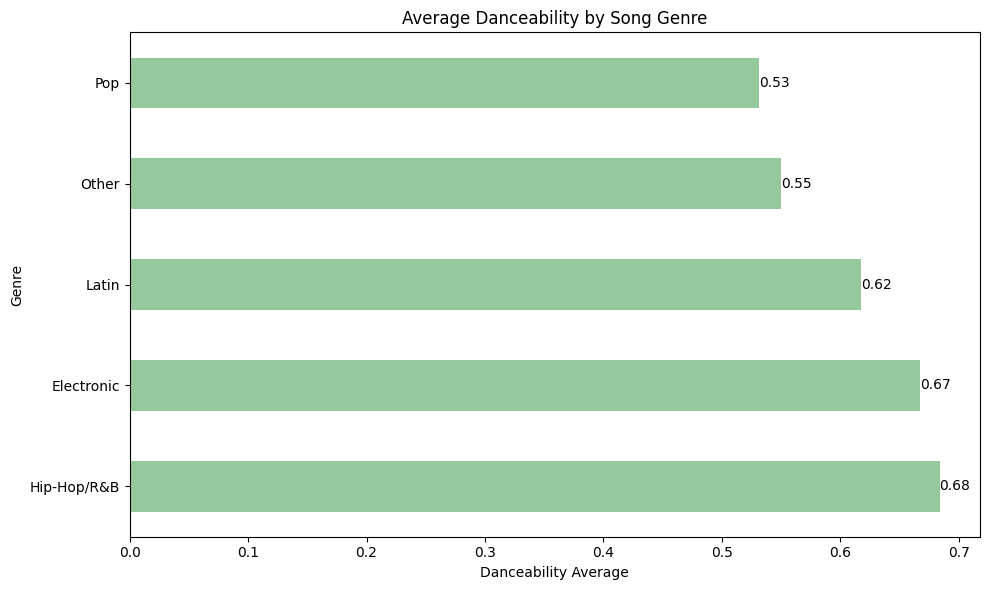

In [48]:
danceability_by_genre = spotify.groupby('genre_cat')['danceability'].mean().sort_values(ascending=False).head(5)


plt.figure(figsize=(10, 6))
bar_plot = danceability_by_genre.plot(kind='barh', color='#95c99c')
plt.title('Average Danceability by Song Genre')
plt.xlabel('Danceability Average')
plt.ylabel('Genre')


for index, value in enumerate(danceability_by_genre):
    plt.text(value, index, str(round(value, 2)), ha='left', va='center')

plt.tight_layout()
plt.show()

Here I wanted to check which genres had the highest "Danceability"; with the results, we can see that the category genre "Hip-Hop/R&B" has the highest with 0.68. This could be because genres in this category, tend to have catchy, danceable beats with distinctive rhythmic patterns that can encourage audience participation on the dance floor. These genres often incorporate rhythmic and percussive elements that are conducive to movement and dance.

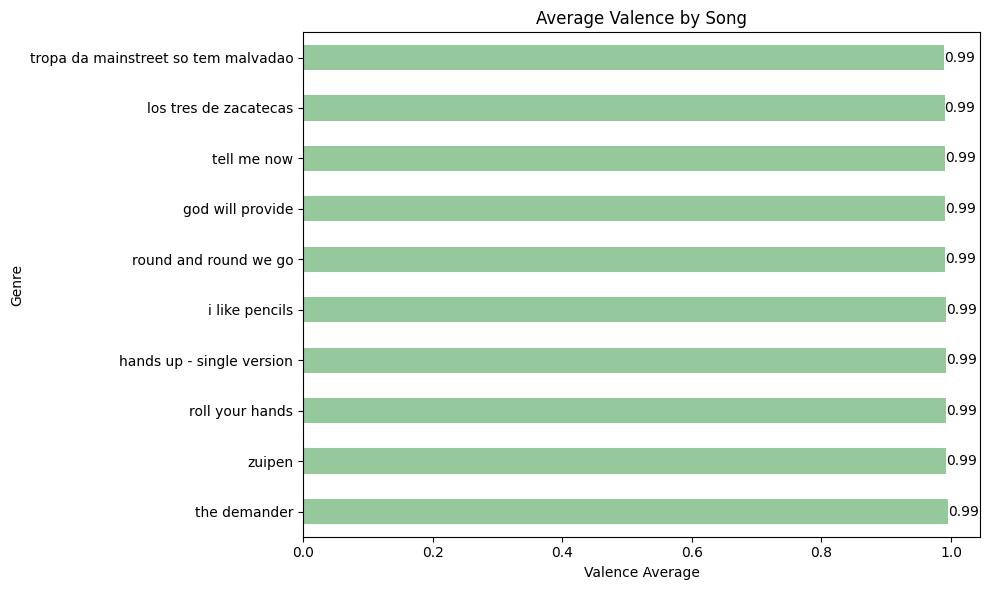

In [52]:
valence_by_track = spotify.groupby('track_name')['valence'].mean().sort_values(ascending=False).head(10)


plt.figure(figsize=(10, 6))
bar_plot = valence_by_track.plot(kind='barh', color='#95c99c')
plt.title('Average Valence by Song')
plt.xlabel('Valence Average')
plt.ylabel('Genre')


for index, value in enumerate(valence_by_track):
    plt.text(value, index, str(round(value, 2)), ha='left', va='center')

plt.tight_layout()
plt.show()

As could be analyzed, the valence is measured in a range from 0 to 1, where a value close to 1 means that the song contains positive characteristics such as if the song is happy, and lower scores reveal if the song is sad.
In this case, I filtered a top 10 songs with a higher average valence, where we found that those 10 songs have a value too close to 1, where we can conclude that they contain happy notes.

Let's see what percentages of the songs are "Explicit" and how many are not:

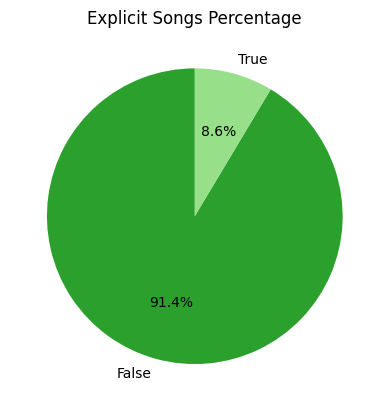

In [49]:
explicit_count = spotify['explicit'].value_counts()

colors = ['#2ca02c', '#98df8a']  

fig, ax = plt.subplots()

ax.pie(explicit_count, labels=explicit_count.index, autopct='%1.1f%%', startangle=90, colors=colors)

ax.set_title('Explicit Songs Percentage')

plt.show()

It is important for me to see this percentage of songs that are explicit and those that are not, as for my final dashboard this will be one of my analytics. 
As we can see, a small percentage of our dataset are explicit songs, which is significant, as I will later analyze what those are and extract more statistical analytics from them.

Now, let's look at the correlation matrix to have an analytic with our quantitative variables:

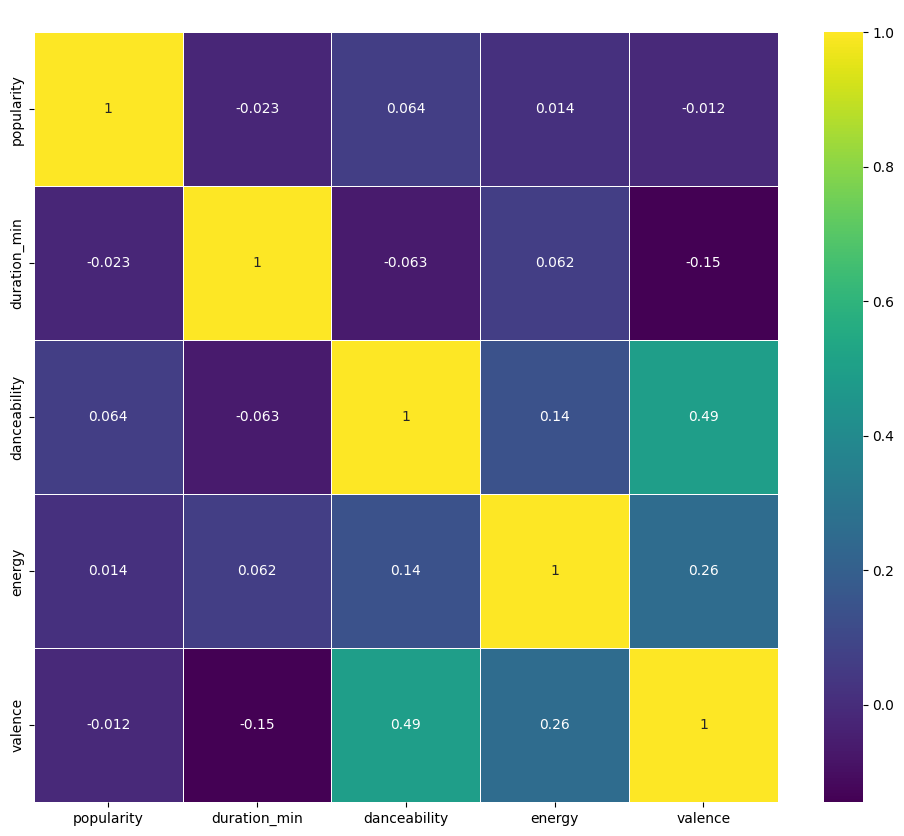

In [54]:
correlation_mat = spotify.select_dtypes(include=["int", "float"]).corr() # Including numerical colmumns

plt.figure(figsize=(12, 10), facecolor='white', edgecolor='black')
ax = plt.axes()
ax.set_facecolor('#292929')
sns.heatmap(correlation_mat, annot=True, cmap='viridis', linewidths=0.5, annot_kws={"size": 10})
plt.title('Correlation Analysis', color='white')
plt.show()


In this correlation matrix, we can see that there is a relatively high correlation between "danceability" and "valence", implying that music with a higher degree of positivity tends to be more danceable.

Also, we can observe a negative correlation between "valence" and "duration_min"; this means that, in general, there is a tendency that as the length of the songs (in minutes) increases, the perceived valence of the music decreases. In other words, longer songs tend to have a lower perceived valence, suggesting that they may be perceived as less positive or happy compared to shorter songs.